<a href="https://colab.research.google.com/github/handsomekiwi/JupyterPractice/blob/master/ML_course_HW/Y2019%20HW9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np  
import matplotlib.pyplot as plt 
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import os  

Using TensorFlow backend.


In [0]:
def isDisplayAvl():  
    return 'DISPLAY' in os.environ.keys()  

In [0]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
  

In [0]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [0]:
np.random.seed(10)  

In [6]:
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# Translation of data  
X_Train40 = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test40 = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32') 

In [0]:
# Standardize feature data  
X_Train40_norm = X_Train40 / 255  
X_Test40_norm = X_Test40 /255  

In [0]:
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test)  

In [0]:
#create the model
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu')) 

# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2
model.add(Conv2D(filters=36,  
                 kernel_size=(3,3),  
                 padding='same',  
                 input_shape=(14,14,16),
                 activation='relu')) 
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  

# Add Dropout layer  
model.add(Dropout(0.25)) 

model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.25))  

model.add(Dense(10, activation='softmax'))  

In [25]:
#show the model
model.summary()  
print("")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               225920    
__________

In [0]:
# define training method  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [27]:
# start training
train_history = model.fit(x=X_Train40_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.5072 - acc: 0.8466 - val_loss: 0.1221 - val_acc: 0.9657
Epoch 2/10
 - 2s - loss: 0.1334 - acc: 0.9591 - val_loss: 0.0728 - val_acc: 0.9788
Epoch 3/10
 - 2s - loss: 0.0913 - acc: 0.9721 - val_loss: 0.0581 - val_acc: 0.9835
Epoch 4/10
 - 2s - loss: 0.0733 - acc: 0.9777 - val_loss: 0.0482 - val_acc: 0.9869
Epoch 5/10
 - 2s - loss: 0.0627 - acc: 0.9808 - val_loss: 0.0441 - val_acc: 0.9859
Epoch 6/10
 - 2s - loss: 0.0538 - acc: 0.9830 - val_loss: 0.0411 - val_acc: 0.9880
Epoch 7/10
 - 2s - loss: 0.0475 - acc: 0.9851 - val_loss: 0.0389 - val_acc: 0.9883
Epoch 8/10
 - 2s - loss: 0.0421 - acc: 0.9862 - val_loss: 0.0374 - val_acc: 0.9878
Epoch 9/10
 - 2s - loss: 0.0396 - acc: 0.9876 - val_loss: 0.0338 - val_acc: 0.9903
Epoch 10/10
 - 2s - loss: 0.0367 - acc: 0.9884 - val_loss: 0.0325 - val_acc: 0.9898


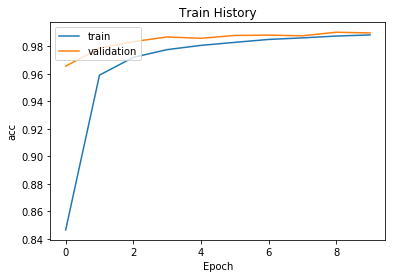

In [28]:
show_train_history(train_history, 'acc', 'val_acc')  

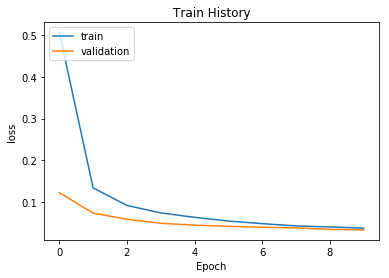

In [29]:
show_train_history(train_history, 'loss', 'val_loss')

In [30]:
scores = model.evaluate(X_Test40_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

10000/10000 [==============================] - 1s 77us/step

	[Info] Accuracy of testing data = 99.1%


In [32]:
#create the model
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu')) 

# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  

# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  

# Add Dropout layer  
model.add(Dropout(0.25)) 

model.add(Flatten())  

model.add(Dropout(0.25))  

model.add(Dense(10, activation='softmax'))  
#show the model
model.summary()  
print("")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
Total para

In [34]:
# define training method  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
# start training
train_history = model.fit(x=X_Train40_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.1858 - acc: 0.9424 - val_loss: 0.1127 - val_acc: 0.9687
Epoch 2/10
 - 2s - loss: 0.1766 - acc: 0.9459 - val_loss: 0.1088 - val_acc: 0.9703
Epoch 3/10
 - 2s - loss: 0.1758 - acc: 0.9463 - val_loss: 0.1046 - val_acc: 0.9711
Epoch 4/10
 - 2s - loss: 0.1663 - acc: 0.9474 - val_loss: 0.1013 - val_acc: 0.9714
Epoch 5/10
 - 2s - loss: 0.1642 - acc: 0.9493 - val_loss: 0.0986 - val_acc: 0.9732
Epoch 6/10
 - 2s - loss: 0.1599 - acc: 0.9510 - val_loss: 0.0959 - val_acc: 0.9734
Epoch 7/10
 - 2s - loss: 0.1554 - acc: 0.9526 - val_loss: 0.0940 - val_acc: 0.9733
Epoch 8/10
 - 2s - loss: 0.1516 - acc: 0.9536 - val_loss: 0.0913 - val_acc: 0.9751
Epoch 9/10
 - 2s - loss: 0.1494 - acc: 0.9537 - val_loss: 0.0894 - val_acc: 0.9744
Epoch 10/10
 - 2s - loss: 0.1460 - acc: 0.9547 - val_loss: 0.0896 - val_acc: 0.9751


In [35]:
scores = model.evaluate(X_Test40_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

10000/10000 [==============================] - 1s 65us/step

	[Info] Accuracy of testing data = 97.6%
